In [1]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 55.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 11.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=b2b9afe8dc012e64f7e7546b0754c46900276364a551f6b4d1c01fb04c703629
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which 

In [2]:
pip install scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from lifelines import LogLogisticAFTFitter, LogNormalAFTFitter, WeibullAFTFitter
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#import eli5
#from eli5.sklearn import PermutationImportance
from scipy import stats
from lifelines.utils import k_fold_cross_validation

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
dlbcl = pd.read_csv('/content/DLBCL.csv')
dlbcl

,time,status,one,a1,a2,a3,a4,a5,a6,a7,...,a7390,a7391,a7392,a7393,a7394,a7395,a7396,a7397,a7398,a7399
0,4.0006,0,1,-0.2210,-0.17860,-0.05025,-0.1922,-0.2944,0.75440,1.0030,...,0.20710,-0.74500,-0.06380,-0.12240,0.72480,-0.13440,0.520300,0.8013,0.939800,0.04403
1,4.9009,0,1,-0.1946,-0.22380,-0.12600,-0.1614,-0.1994,-0.32301,0.2532,...,0.22860,-0.14917,0.31320,-0.15710,0.15220,-0.33700,-0.254000,0.2317,-0.022500,-0.20954
2,5.6003,0,1,-0.3179,-0.15850,-0.48560,-0.3483,-0.4490,-0.17260,0.2333,...,0.63400,-0.36613,-0.26613,-0.39330,-1.18100,0.08445,-0.112900,0.6758,-0.314630,-0.06200
3,12.1010,0,1,0.4269,0.26242,1.70900,0.7984,0.4512,0.31030,0.5402,...,0.31650,0.34965,0.14732,0.29881,-0.00655,0.01305,0.433610,0.2822,0.119900,0.19310
4,0.6001,1,1,0.5116,0.79760,1.46400,1.0520,1.0410,-0.22900,1.4150,...,-0.05970,0.05024,0.66020,-0.03310,-0.20860,-0.11076,0.215510,-0.3900,-0.309100,-0.08185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.3009,1,1,-0.2227,-0.27700,-0.32350,-0.6641,-0.7011,-0.11510,0.4525,...,-0.31110,0.09790,0.33086,0.38280,0.23150,1.21700,-0.106800,0.2461,0.202600,0.31298
236,3.1003,1,1,-0.4175,-0.31630,-0.48310,-0.4963,-0.5528,-0.27380,-0.0632,...,0.63180,-0.03500,0.82470,0.52020,-0.56680,-0.04245,-0.024525,0.8613,0.182430,-0.04760
237,7.7001,0,1,-0.2064,-0.00940,-0.15120,0.0637,-0.0390,0.20170,0.1626,...,0.59830,0.48100,-0.01767,0.04740,-0.62020,0.13630,-0.132950,0.1046,0.223800,0.24470
238,2.7005,1,1,0.1602,-0.03630,-0.34550,-0.1353,-0.1539,0.13063,-1.4390,...,0.05921,0.05425,0.03089,-0.34140,-2.75600,0.12474,0.148970,0.2447,0.072645,0.24851


In [5]:
dlbcl.keys()

Index(['time', 'status', 'one', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7',
       ...
       'a7390', 'a7391', 'a7392', 'a7393', 'a7394', 'a7395', 'a7396', 'a7397',
       'a7398', 'a7399'],
      dtype='object', length=7402)

In [6]:
dlbcl_X = dlbcl.copy()
del dlbcl_X['one']
del dlbcl_X['time']
del dlbcl_X['status']
dlbcl_X

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a7390,a7391,a7392,a7393,a7394,a7395,a7396,a7397,a7398,a7399
0,-0.2210,-0.17860,-0.05025,-0.1922,-0.2944,0.75440,1.0030,0.2628,-0.24820,0.13030,...,0.20710,-0.74500,-0.06380,-0.12240,0.72480,-0.13440,0.520300,0.8013,0.939800,0.04403
1,-0.1946,-0.22380,-0.12600,-0.1614,-0.1994,-0.32301,0.2532,0.9026,0.61930,0.72570,...,0.22860,-0.14917,0.31320,-0.15710,0.15220,-0.33700,-0.254000,0.2317,-0.022500,-0.20954
2,-0.3179,-0.15850,-0.48560,-0.3483,-0.4490,-0.17260,0.2333,1.2680,0.91860,-0.08960,...,0.63400,-0.36613,-0.26613,-0.39330,-1.18100,0.08445,-0.112900,0.6758,-0.314630,-0.06200
3,0.4269,0.26242,1.70900,0.7984,0.4512,0.31030,0.5402,0.5965,0.43840,0.40110,...,0.31650,0.34965,0.14732,0.29881,-0.00655,0.01305,0.433610,0.2822,0.119900,0.19310
4,0.5116,0.79760,1.46400,1.0520,1.0410,-0.22900,1.4150,1.8440,1.84000,1.67100,...,-0.05970,0.05024,0.66020,-0.03310,-0.20860,-0.11076,0.215510,-0.3900,-0.309100,-0.08185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-0.2227,-0.27700,-0.32350,-0.6641,-0.7011,-0.11510,0.4525,0.2162,0.10190,0.03950,...,-0.31110,0.09790,0.33086,0.38280,0.23150,1.21700,-0.106800,0.2461,0.202600,0.31298
236,-0.4175,-0.31630,-0.48310,-0.4963,-0.5528,-0.27380,-0.0632,-1.3730,-0.97200,-1.32600,...,0.63180,-0.03500,0.82470,0.52020,-0.56680,-0.04245,-0.024525,0.8613,0.182430,-0.04760
237,-0.2064,-0.00940,-0.15120,0.0637,-0.0390,0.20170,0.1626,0.2247,0.74710,0.78710,...,0.59830,0.48100,-0.01767,0.04740,-0.62020,0.13630,-0.132950,0.1046,0.223800,0.24470
238,0.1602,-0.03630,-0.34550,-0.1353,-0.1539,0.13063,-1.4390,-2.5410,-0.08526,-0.09387,...,0.05921,0.05425,0.03089,-0.34140,-2.75600,0.12474,0.148970,0.2447,0.072645,0.24851


#PCA

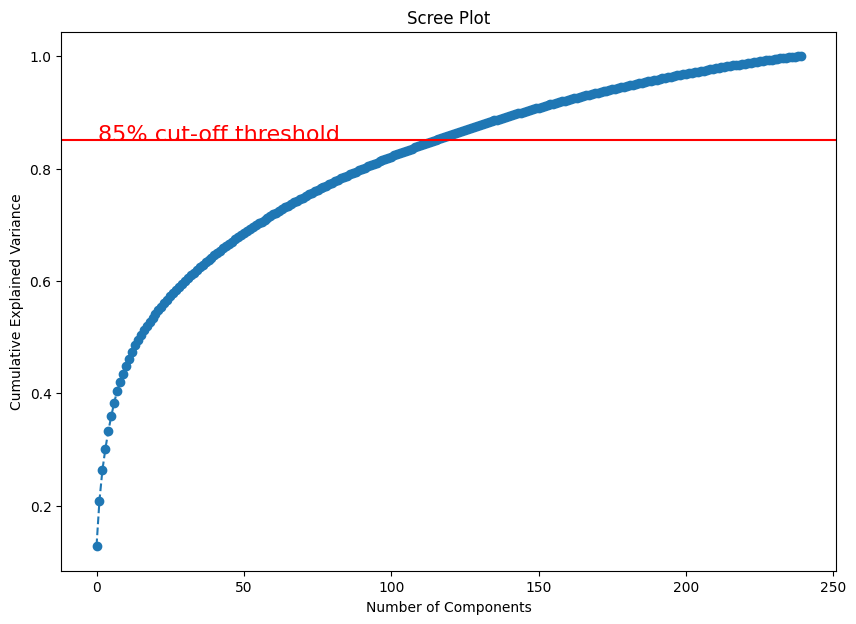

Eigenvalues > 1: 239
Number of Components explaining 85% variance is 116


In [8]:
# Fit PCA
scaler = StandardScaler()
dlbcl_standard = scaler.fit_transform(dlbcl_X)
pca = PCA().fit(dlbcl_standard)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# Eigenvalue > 1 (Kaiser Criterion)
eigenvalues = pca.explained_variance_
print("Eigenvalues > 1:", np.sum(eigenvalues > 1))

# Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance)
print("Number of Components explaining 85% variance is", np.argmax(cumulative_variance >= 0.85) + 1)

In [16]:
pca = PCA(n_components=30)
feat_pca = pca.fit_transform(dlbcl_standard)
name_pca = ["X_"+str(i) for i in range(feat_pca.shape[1])]
dlbcl_pca = pd.DataFrame(data = feat_pca, columns=name_pca)
dlbcl_pca['time'] = dlbcl['time']
dlbcl_pca['status'] = dlbcl['status']
dlbcl_pca

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,time,status
0,-14.808819,-19.137389,-19.501778,11.817633,11.805894,-2.853717,-6.875285,1.717927,13.446807,1.643827,...,0.133348,-5.538253,3.388225,-0.035597,3.211779,3.859325,1.406184,3.046922,4.0006,0
1,-13.749793,-37.296347,-11.137659,-11.975583,-0.787618,14.951296,-9.150377,-3.590461,15.453161,-2.505198,...,1.252986,-4.180452,-1.834851,-0.950064,-3.993140,-5.235912,4.220466,-3.444688,4.9009,0
2,-8.329926,-51.004029,25.581169,-11.050282,-9.626251,-11.834206,-8.993765,-27.596828,7.855990,-6.983476,...,-6.454802,5.130289,3.650525,0.973630,-1.641833,1.680004,0.541107,-0.852713,5.6003,0
3,41.509068,-6.518565,-5.185067,-12.527895,-1.375861,8.416550,-22.362095,-27.242881,18.511584,-1.731797,...,1.171555,4.174606,7.249552,0.529401,-3.109818,2.028925,1.767699,-4.234180,12.1010,0
4,33.360718,-21.661681,15.586604,-24.047535,6.126222,4.236996,2.406525,-24.537440,5.149163,18.540366,...,4.142130,11.500741,4.892997,-11.119371,11.886663,-0.098423,-6.919409,-4.277103,0.6001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,42.355140,23.400849,0.741070,-17.994409,9.720739,14.033103,7.364631,-15.458386,10.814540,-11.637197,...,2.360751,-2.984705,-0.868614,1.358084,-1.463038,1.729716,3.826807,3.527205,0.3009,1
236,-1.274805,37.629731,8.573035,14.447894,16.590295,-14.440401,-3.903841,14.898357,-4.031698,-6.445998,...,-2.165774,6.954192,10.502038,-2.729647,-0.583323,-1.936612,-0.735641,2.259204,3.1003,1
237,-33.368722,50.614841,-4.047325,-10.557774,-12.655923,-17.462634,-1.016180,-8.596726,-8.932722,4.583387,...,-3.231272,-6.832459,-0.109891,2.467318,-0.553222,-1.564911,-4.252705,1.842185,7.7001,0
238,-9.874411,36.629251,-18.035617,3.440866,-12.254583,-2.312305,15.708297,-8.149194,7.864595,-0.149823,...,1.524999,6.126358,-19.208781,-18.811058,-0.946489,18.261546,-1.957504,-2.761042,2.7005,1


In [17]:
X_train, X_test, E_train, E_test, Y_train, Y_test = train_test_split(dlbcl_pca[name_pca], dlbcl_pca['status'], dlbcl_pca['time'], test_size=0.25, random_state=17)
aft_weibull_imp = WeibullAFTFitter()
aft_weibull_imp.fit(pd.concat([X_train, E_train, Y_train], axis=1), duration_col='time', event_col='status', robust=True)
aft_weibull_imp.print_summary()
print("C-Index for testing= ", aft_weibull_imp.score(pd.concat([X_test, E_test, Y_test], axis=1), scoring_method="concordance_index"))

<lifelines.WeibullAFTFitter: fitted with 180 total observations, 77 right-censored observations>
             duration col = 'time'
                event col = 'status'
          robust variance = True
   number of observations = 180
number of events observed = 103
           log-likelihood = -235.12
         time fit was run = 2024-07-14 04:58:43 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                  
lambda_ X_0       -0.00      1.00      0.01           -0.02            0.01                0.98                1.01
        X_1       -0.00      1.00      0.01           -0.01            0.01                0.99                1.01
        X_10      -0.03      0.97      0.02           -0.06           -0.00                0.94                1.00
        X_11      -0.02      0.98      0.02           -0.06            0.02                0.94                1.02
        X_12      -0.05      0.95      0.02           -0.08           -0.01                0.92                0.99
        X_13      -0.01      0.99      0.02           -0.05            0.03                0.96                1.03
        X_14       0.01      1.01      0.02           -0.02            0.05                0.98                1.05
        X_15       0.00      1.00      0.02           -0.04            0.04                0.96                1.04
        X_16       0.01      1.01      0.02           -0.04            0.05                0.96                1.06
        X_17      -0.02      0.98      0.02           -0.06            0.02                0.94                1.02
        X_18      -0.03      0.97      0.02           -0.07            0.01                0.93                1.01
        X_19      -0.01      0.99      0.02           -0.05            0.03                0.95                1.03
        X_2       -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
        X_20      -0.00      1.00      0.03           -0.06            0.05                0.94                1.05
        X_21       0.05      1.05      0.02            0.01            0.10                1.01                1.10
        X_22      -0.05      0.95      0.02           -0.09           -0.00                0.91                1.00
        X_23      -0.05      0.95      0.03           -0.10            0.00                0.91                1.00
        X_24      -0.03      0.97      0.03           -0.09            0.02                0.92                1.02
        X_25       0.07      1.07      0.02            0.02            0.12                1.02                1.12
        X_26       0.07      1.07      0.03            0.01            0.12                1.01                1.12
        X_27      -0.10      0.90      0.03           -0.15           -0.05                0.86                0.95
        X_28       0.03      1.03      0.03           -0.02            0.09                0.98                1.09
        X_29      -0.03      0.97      0.03           -0.08            0.03                0.92                1.03
        X_3        0.02      1.02      0.01            0.01            0.04                1.01                1.04
        X_4       -0.03      0.97      0.01           -0.05           -0.01                0.95                0.99
        X_5        0.01      1.01      0.01           -0.01            0.03                0.99                1.03
        X_6       -0.01      0.99      0.01           -0.04            0.01                0.96                1.01
        X_7       -0.03      0.97      0.01           -0.06            0.00                0.95                1.00
        X_8        0.05      1.05      0.01            0.02            0.08                1.02                1.08
        X_9        0.01      1.01      0.02  

C-Index for testing=  0.6156635242929659


In [18]:
aft_loglogistic_imp = LogLogisticAFTFitter()
aft_loglogistic_imp.fit(pd.concat([X_train, E_train, Y_train], axis=1), duration_col='time', event_col='status', robust=True)
aft_loglogistic_imp.print_summary()
print("C-Index for testing= ", aft_loglogistic_imp.score(pd.concat([X_test, E_test, Y_test], axis=1), scoring_method="concordance_index"))

<lifelines.LogLogisticAFTFitter: fitted with 180 total observations, 77 right-censored observations>
             duration col = 'time'
                event col = 'status'
          robust variance = True
   number of observations = 180
number of events observed = 103
           log-likelihood = -233.55
         time fit was run = 2024-07-14 04:58:50 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                  
alpha_ X_0       -0.00      1.00      0.01           -0.02            0.01                0.98                1.01
       X_1        0.00      1.00      0.01           -0.01            0.02                0.99                1.02
       X_10      -0.03      0.97      0.02           -0.06            0.01                0.94                1.01
       X_11      -0.02      0.98      0.02           -0.06            0.02                0.94                1.02
       X_12      -0.06      0.94      0.02           -0.09           -0.02                0.91                0.98
       X_13      -0.01      0.99      0.02           -0.05            0.04                0.95                1.04
       X_14       0.01      1.01      0.02           -0.03            0.04                0.97                1.04
       X_15       0.02      1.02      0.02           -0.02            0.07                0.98                1.07
       X_16       0.01      1.01      0.02           -0.03            0.05                0.97                1.05
       X_17      -0.02      0.98      0.02           -0.06            0.03                0.94                1.03
       X_18      -0.02      0.98      0.02           -0.06            0.03                0.94                1.03
       X_19      -0.03      0.97      0.03           -0.08            0.02                0.92                1.02
       X_2       -0.02      0.98      0.01           -0.04            0.00                0.97                1.00
       X_20       0.00      1.00      0.02           -0.05            0.05                0.96                1.05
       X_21       0.06      1.06      0.03            0.01            0.11                1.01                1.11
       X_22      -0.06      0.94      0.03           -0.11           -0.01                0.90                0.99
       X_23      -0.04      0.96      0.03           -0.09            0.01                0.91                1.01
       X_24      -0.03      0.97      0.02           -0.08            0.02                0.92                1.02
       X_25       0.04      1.04      0.03           -0.01            0.09                0.99                1.10
       X_26       0.06      1.06      0.03            0.01            0.11                1.01                1.11
       X_27      -0.09      0.92      0.03           -0.15           -0.03                0.86                0.97
       X_28       0.03      1.03      0.03           -0.03            0.09                0.97                1.10
       X_29      -0.01      0.99      0.03           -0.07            0.05                0.94                1.05
       X_3        0.03      1.03      0.01            0.01            0.05                1.01                1.05
       X_4       -0.03      0.97      0.01           -0.06           -0.00                0.94                1.00
       X_5        0.00      1.00      0.01           -0.02            0.03                0.98                1.03
       X_6       -0.02      0.98      0.01           -0.05            0.01                0.96                1.01
       X_7       -0.03      0.97      0.01           -0.05            0.00                0.95                1.00
       X_8        0.06      1.06      0.01            0.03            0.09                1.03                1.09
       X_9        0.01      1.01      0.02           -0.02            0.

C-Index for testing=  0.6171138506163887


In [19]:
aft_lognormal_imp = LogNormalAFTFitter()
aft_lognormal_imp.fit(pd.concat([X_train, E_train, Y_train], axis=1), duration_col='time', event_col='status', robust=True)
aft_lognormal_imp.print_summary()
print("C-Index for testing= ", aft_lognormal_imp.score(pd.concat([X_test, E_test, Y_test], axis=1), scoring_method="concordance_index"))

<lifelines.LogNormalAFTFitter: fitted with 180 total observations, 77 right-censored observations>
             duration col = 'time'
                event col = 'status'
          robust variance = True
   number of observations = 180
number of events observed = 103
           log-likelihood = -235.06
         time fit was run = 2024-07-14 04:58:52 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                  
mu_    X_0       -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
       X_1        0.00      1.00      0.01           -0.01            0.02                0.99                1.02
       X_10      -0.03      0.97      0.02           -0.06            0.01                0.94                1.01
       X_11      -0.02      0.98      0.02           -0.05            0.01                0.95                1.01
       X_12      -0.05      0.95      0.02           -0.08           -0.02                0.92                0.98
       X_13      -0.00      1.00      0.02           -0.04            0.04                0.96                1.04
       X_14       0.00      1.00      0.02           -0.03            0.04                0.97                1.04
       X_15       0.02      1.02      0.02           -0.02            0.06                0.98                1.06
       X_16       0.01      1.01      0.02           -0.03            0.05                0.97                1.05
       X_17      -0.02      0.98      0.02           -0.06            0.02                0.94                1.02
       X_18      -0.01      0.99      0.02           -0.05            0.03                0.95                1.03
       X_19      -0.03      0.97      0.02           -0.08            0.01                0.92                1.01
       X_2       -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
       X_20       0.00      1.00      0.02           -0.04            0.05                0.96                1.05
       X_21       0.07      1.07      0.03            0.02            0.12                1.02                1.13
       X_22      -0.06      0.94      0.02           -0.11           -0.02                0.90                0.98
       X_23      -0.04      0.96      0.02           -0.09            0.01                0.92                1.01
       X_24      -0.04      0.96      0.02           -0.08            0.01                0.92                1.01
       X_25       0.04      1.04      0.02           -0.01            0.09                0.99                1.09
       X_26       0.06      1.06      0.02            0.01            0.10                1.01                1.11
       X_27      -0.09      0.91      0.03           -0.15           -0.04                0.86                0.96
       X_28       0.04      1.04      0.03           -0.02            0.09                0.98                1.10
       X_29      -0.02      0.98      0.03           -0.08            0.04                0.93                1.04
       X_3        0.03      1.03      0.01            0.01            0.05                1.01                1.05
       X_4       -0.03      0.97      0.01           -0.06           -0.01                0.94                0.99
       X_5       -0.00      1.00      0.01           -0.02            0.02                0.98                1.02
       X_6       -0.02      0.98      0.01           -0.04            0.01                0.96                1.01
       X_7       -0.03      0.97      0.01           -0.06           -0.01                0.94                0.99
       X_8        0.06      1.06      0.01            0.03            0.09                1.03                1.09
       X_9        0.01      1.01      0.02           -0.02            0.04

C-Index for testing=  0.6192893401015228


In [14]:
#Buat label RSF
dt = [('cens', '?'), ('time', '<f8')]
Y_ = []
for i, a in enumerate(dlbcl_pca['time']):
  if dlbcl_pca['status'][i]==1:
    Y_.append((True, a))
  else:
    Y_.append((False, a))

Y_ar = np. array(Y_, dtype=dt)
Y_ar

array([(False, 4.0006e+00), (False, 4.9009e+00), (False, 5.6003e+00),
       (False, 1.2101e+01), ( True, 6.0010e-01), ( True, 3.0007e-01),
       ( True, 4.0023e-01), ( True, 1.2009e+00), ( True, 2.4001e+00),
       ( True, 1.2003e+00), (False, 8.8010e+00), (False, 8.1002e+00),
       (False, 5.2005e+00), (False, 8.1003e+00), ( True, 2.8007e+00),
       ( True, 4.5010e+00), (False, 4.3008e+00), ( True, 2.5007e+00),
       ( True, 1.3001e+00), ( True, 1.0010e-01), ( True, 1.7000e+00),
       (False, 7.2003e+00), ( True, 6.0082e-01), ( True, 9.8548e-04),
       ( True, 3.0002e-01), ( True, 3.0082e-01), ( True, 2.5006e+00),
       (False, 1.0801e+01), (False, 7.7002e+00), (False, 5.9008e+00),
       ( True, 1.6900e+01), (False, 9.7008e+00), (False, 1.0101e+01),
       (False, 1.6002e+00), ( True, 8.0060e-01), ( True, 3.9006e+00),
       ( True, 3.3007e+00), (False, 7.1002e+00), (False, 3.3006e+00),
       (False, 6.8002e+00), ( True, 5.3960e-04), ( True, 1.0062e-01),
       ( True, 2.700

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(dlbcl_pca[name_pca], Y_ar, test_size=0.25, random_state=17)
rsf_aml1 = RandomSurvivalForest(n_estimators=70,
                           min_samples_split=3,
                           min_samples_leaf=10,
                           max_features="sqrt",
                           n_jobs=-1, random_state=1)
rsf_aml1.fit(X_train, Y_train)
c_rsf1 = rsf_aml1.score(X_test, Y_test)
print("C-Index = ", c_rsf1)

C-Index =  0.6388687454677302


# Factor Analysis

In [37]:
FA = FactorAnalysis(n_components=15, random_state=0)
feat_fa = FA.fit_transform(dlbcl_standard)
name_fa = ["X_"+str(i) for i in range(feat_fa.shape[1])]
dlbcl_fa = pd.DataFrame(data = feat_fa, columns=name_fa)
dlbcl_fa['time'] = dlbcl['time']
dlbcl_fa['status'] = dlbcl['status']
dlbcl_fa

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,time,status
0,0.486969,0.673170,-1.000169,0.934007,-0.683607,0.047311,0.579131,-0.483931,-1.068447,-0.037201,-0.429451,-0.751174,0.100350,1.062700,-0.628344,4.0006,0
1,0.492543,1.388519,-1.008886,-0.788881,-0.141103,-1.254176,0.690956,0.085651,-1.104976,0.198503,-2.162625,0.392025,0.389199,1.198779,-0.152542,4.9009,0
2,0.189832,2.288225,0.972289,-0.470326,0.414899,1.240300,0.832752,1.953202,-0.828802,1.359339,-0.149865,0.346411,-0.494322,0.863091,-1.407890,5.6003,0
3,-1.240295,0.196526,-0.538235,-0.562234,-0.243928,-0.507663,1.737259,2.227199,-1.837260,0.139667,-1.607737,-1.912331,0.941483,-0.742153,-1.038398,12.1010,0
4,-1.071226,1.010723,0.428130,-1.228516,-0.774891,0.067206,-0.399120,2.197449,-1.146463,-1.231424,0.365538,-0.424535,-0.174900,0.838852,-2.349365,0.6001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-1.390012,-1.050208,0.001306,-0.867935,-0.947623,-0.776720,-0.386758,1.074170,-0.663536,1.456646,-0.675944,-0.496864,0.479750,1.241406,-0.770862,0.3009,1
236,0.064032,-1.428085,0.809274,0.949475,-0.743342,0.752402,0.373615,-1.252262,0.504275,0.472045,0.825891,-1.187815,1.977609,0.740452,-0.605541,3.1003,1
237,1.104698,-1.989133,0.076194,-0.544962,0.840289,1.326526,0.004557,0.690313,0.377675,-0.256119,1.224656,-0.513159,-0.301191,0.944657,-0.391751,7.7001,0
238,0.213718,-1.622673,-0.725326,0.190261,0.722763,0.318742,-1.105716,0.678109,-0.989379,1.286362,1.511035,1.146778,3.502055,0.353848,2.150130,2.7005,1


In [38]:
X_train, X_test, E_train, E_test, Y_train, Y_test = train_test_split(dlbcl_fa[name_fa], dlbcl_fa['status'], dlbcl_fa['time'], test_size=0.25, random_state=17)
aft_weibull_imp = WeibullAFTFitter()
aft_weibull_imp.fit(pd.concat([X_train, E_train, Y_train], axis=1), duration_col='time', event_col='status', robust=True)
aft_weibull_imp.print_summary()
print("C-Index for testing= ", aft_weibull_imp.score(pd.concat([X_test, E_test, Y_test], axis=1), scoring_method="concordance_index"))

<lifelines.WeibullAFTFitter: fitted with 180 total observations, 77 right-censored observations>
             duration col = 'time'
                event col = 'status'
          robust variance = True
   number of observations = 180
number of events observed = 103
           log-likelihood = -256.59
         time fit was run = 2024-07-14 05:05:15 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                  
lambda_ X_0        0.17      1.18      0.17           -0.17            0.51                0.84                1.66
        X_1        0.07      1.07      0.18           -0.28            0.42                0.75                1.52
        X_10      -0.52      0.60      0.20           -0.91           -0.13                0.40                0.88
        X_11      -0.21      0.81      0.18           -0.57            0.14                0.57                1.15
        X_12      -0.19      0.83      0.18           -0.53            0.15                0.59                1.17
        X_13       0.10      1.10      0.21           -0.31            0.51                0.73                1.66
        X_14      -0.25      0.78      0.18           -0.60            0.10                0.55                1.10
        X_2       -0.46      0.63      0.17           -0.79           -0.13                0.46                0.88
        X_3        0.31      1.37      0.19           -0.07            0.70                0.94                2.00
        X_4        0.53      1.69      0.19            0.16            0.89                1.17                2.44
        X_5        0.07      1.07      0.17           -0.27            0.41                0.76                1.51
        X_6        0.13      1.14      0.20           -0.26            0.52                0.77                1.68
        X_7        0.23      1.25      0.20           -0.17            0.62                0.85                1.86
        X_8       -0.35      0.70      0.17           -0.70           -0.01                0.50                0.99
        X_9       -0.10      0.90      0.17           -0.43            0.22                0.65                1.25
        Intercept  2.14      8.52      0.19            1.77            2.52                5.85               12.42
rho_    Intercept -0.52      0.60      0.08           -0.67           -0.36                0.51                0.70

                   cmp to     z      p  -log2(p)
param   covariate                               
lambda_ X_0          0.00  0.97   0.33      1.59
        X_1          0.00  0.39   0.70      0.51
        X_10         0.00 -2.61   0.01      6.80
        X_11         0.00 -1.17   0.24      2.05
        X_12         0.00 -1.08   0.28      1.84
        X_13         0.00  0.48   0.63      0.66
        X_14         0.00 -1.41   0.16      2.66
        X_2          0.00 -2.76   0.01      7.42
        X_3          0.00  1.62   0.10      3.26
        X_4          0.00  2.80   0.01      7.61
        X_5          0.00  0.40   0.69      0.54
        X_6          0.00  0.67   0.50      0.99
        X_7          0.00  1.13   0.26      1.95
        X_8          0.00 -2.02   0.04      4.54
        X_9          0.00 -0.61   0.54      0.89
        Intercept    0.00 11.16 <0.005     93.63
rho_    Intercept    0.00 -6.57 <0.005     34.23
---
Concordance = 0.67
AIC = 547.19
log-likelihood ratio test = 40.71 on 15 df
-log2(p) of ll-ratio test = 11.46

C-Index for testing=  0.678027556200145


In [39]:
aft_loglogistic_imp = LogLogisticAFTFitter()
aft_loglogistic_imp.fit(pd.concat([X_train, E_train, Y_train], axis=1), duration_col='time', event_col='status', robust=True)
aft_loglogistic_imp.print_summary()
print("C-Index for testing= ", aft_loglogistic_imp.score(pd.concat([X_test, E_test, Y_test], axis=1), scoring_method="concordance_index"))

<lifelines.LogLogisticAFTFitter: fitted with 180 total observations, 77 right-censored observations>
             duration col = 'time'
                event col = 'status'
          robust variance = True
   number of observations = 180
number of events observed = 103
           log-likelihood = -252.47
         time fit was run = 2024-07-14 05:05:17 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                  
alpha_ X_0        0.17      1.18      0.19           -0.20            0.54                0.82                1.71
       X_1       -0.08      0.93      0.18           -0.43            0.28                0.65                1.33
       X_10      -0.63      0.53      0.22           -1.06           -0.20                0.35                0.82
       X_11      -0.24      0.78      0.17           -0.58            0.09                0.56                1.09
       X_12      -0.08      0.92      0.18           -0.43            0.27                0.65                1.31
       X_13       0.02      1.02      0.25           -0.47            0.51                0.62                1.66
       X_14      -0.20      0.82      0.18           -0.54            0.15                0.58                1.16
       X_2       -0.43      0.65      0.20           -0.83           -0.04                0.44                0.96
       X_3        0.39      1.48      0.20           -0.01            0.79                0.99                2.21
       X_4        0.46      1.58      0.21            0.04            0.87                1.04                2.39
       X_5       -0.00      1.00      0.19           -0.37            0.36                0.69                1.44
       X_6        0.17      1.19      0.20           -0.22            0.57                0.80                1.76
       X_7        0.22      1.25      0.20           -0.17            0.62                0.84                1.86
       X_8       -0.52      0.60      0.21           -0.92           -0.11                0.40                0.89
       X_9       -0.15      0.86      0.18           -0.51            0.20                0.60                1.22
       Intercept  1.40      4.06      0.19            1.03            1.78                2.79                5.91
beta_  Intercept -0.25      0.78      0.09           -0.42           -0.07                0.66                0.93

                  cmp to     z      p  -log2(p)
param  covariate                               
alpha_ X_0          0.00  0.88   0.38      1.40
       X_1          0.00 -0.41   0.68      0.56
       X_10         0.00 -2.87 <0.005      7.95
       X_11         0.00 -1.43   0.15      2.71
       X_12         0.00 -0.46   0.64      0.64
       X_13         0.00  0.07   0.94      0.08
       X_14         0.00 -1.11   0.27      1.90
       X_2          0.00 -2.17   0.03      5.06
       X_3          0.00  1.91   0.06      4.15
       X_4          0.00  2.15   0.03      4.97
       X_5          0.00 -0.01   0.99      0.01
       X_6          0.00  0.86   0.39      1.35
       X_7          0.00  1.10   0.27      1.89
       X_8          0.00 -2.51   0.01      6.38
       X_9          0.00 -0.85   0.40      1.34
       Intercept    0.00  7.31 <0.005     41.81
beta_  Intercept    0.00 -2.73   0.01      7.29
---
Concordance = 0.68
AIC = 538.95
log-likelihood ratio test = 41.58 on 15 df
-log2(p) of ll-ratio test = 11.91

C-Index for testing=  0.6598984771573604


In [40]:
aft_lognormal_imp = LogNormalAFTFitter()
aft_lognormal_imp.fit(pd.concat([X_train, E_train, Y_train], axis=1), duration_col='time', event_col='status', robust=True)
aft_lognormal_imp.print_summary()
print("C-Index for testing= ", aft_lognormal_imp.score(pd.concat([X_test, E_test, Y_test], axis=1), scoring_method="concordance_index"))

<lifelines.LogNormalAFTFitter: fitted with 180 total observations, 77 right-censored observations>
             duration col = 'time'
                event col = 'status'
          robust variance = True
   number of observations = 180
number of events observed = 103
           log-likelihood = -253.69
         time fit was run = 2024-07-14 05:05:19 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                  
mu_    X_0        0.22      1.25      0.20           -0.18            0.62                0.84                1.86
       X_1       -0.09      0.91      0.18           -0.45            0.27                0.64                1.30
       X_10      -0.63      0.53      0.20           -1.02           -0.24                0.36                0.79
       X_11      -0.24      0.78      0.17           -0.59            0.10                0.56                1.10
       X_12      -0.09      0.92      0.18           -0.43            0.26                0.65                1.30
       X_13       0.03      1.03      0.22           -0.41            0.46                0.66                1.59
       X_14      -0.21      0.81      0.17           -0.55            0.13                0.58                1.13
       X_2       -0.40      0.67      0.20           -0.78           -0.02                0.46                0.98
       X_3        0.41      1.51      0.19            0.04            0.79                1.04                2.20
       X_4        0.53      1.70      0.22            0.10            0.96                1.11                2.62
       X_5        0.03      1.03      0.18           -0.32            0.38                0.72                1.47
       X_6        0.20      1.22      0.21           -0.21            0.60                0.81                1.83
       X_7        0.29      1.34      0.19           -0.08            0.66                0.93                1.94
       X_8       -0.57      0.57      0.20           -0.96           -0.18                0.38                0.84
       X_9       -0.11      0.89      0.18           -0.48            0.25                0.62                1.28
       Intercept  1.46      4.30      0.20            1.06            1.86                2.89                6.40
sigma_ Intercept  0.84      2.31      0.09            0.66            1.01                1.94                2.74

                  cmp to     z      p  -log2(p)
param  covariate                               
mu_    X_0          0.00  1.09   0.27      1.87
       X_1          0.00 -0.49   0.62      0.69
       X_10         0.00 -3.16 <0.005      9.29
       X_11         0.00 -1.39   0.16      2.61
       X_12         0.00 -0.49   0.63      0.67
       X_13         0.00  0.11   0.91      0.14
       X_14         0.00 -1.23   0.22      2.19
       X_2          0.00 -2.04   0.04      4.61
       X_3          0.00  2.16   0.03      5.01
       X_4          0.00  2.44   0.01      6.08
       X_5          0.00  0.16   0.87      0.20
       X_6          0.00  0.96   0.34      1.57
       X_7          0.00  1.55   0.12      3.06
       X_8          0.00 -2.84 <0.005      7.80
       X_9          0.00 -0.62   0.53      0.90
       Intercept    0.00  7.18 <0.005     40.34
sigma_ Intercept    0.00  9.49 <0.005     68.60
---
Concordance = 0.67
AIC = 541.38
log-likelihood ratio test = 45.01 on 15 df
-log2(p) of ll-ratio test = 13.68

C-Index for testing=  0.6606236403190718


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(dlbcl_fa[name_fa], Y_ar, test_size=0.25, random_state=17)
rsf_dlbcl2 = RandomSurvivalForest(n_estimators=70,
                           min_samples_split=3,
                           min_samples_leaf=10,
                           max_features="sqrt",
                           n_jobs=-1, random_state=1)
rsf_dlbcl2.fit(X_train, Y_train)
c_rsf2 = rsf_dlbcl2.score(X_test, Y_test)
print("C-Index = ", c_rsf2)

C-Index =  0.6744017403915881
